In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/workspaces/EDA_5_alfonso/data/raw/diabetes.csv')

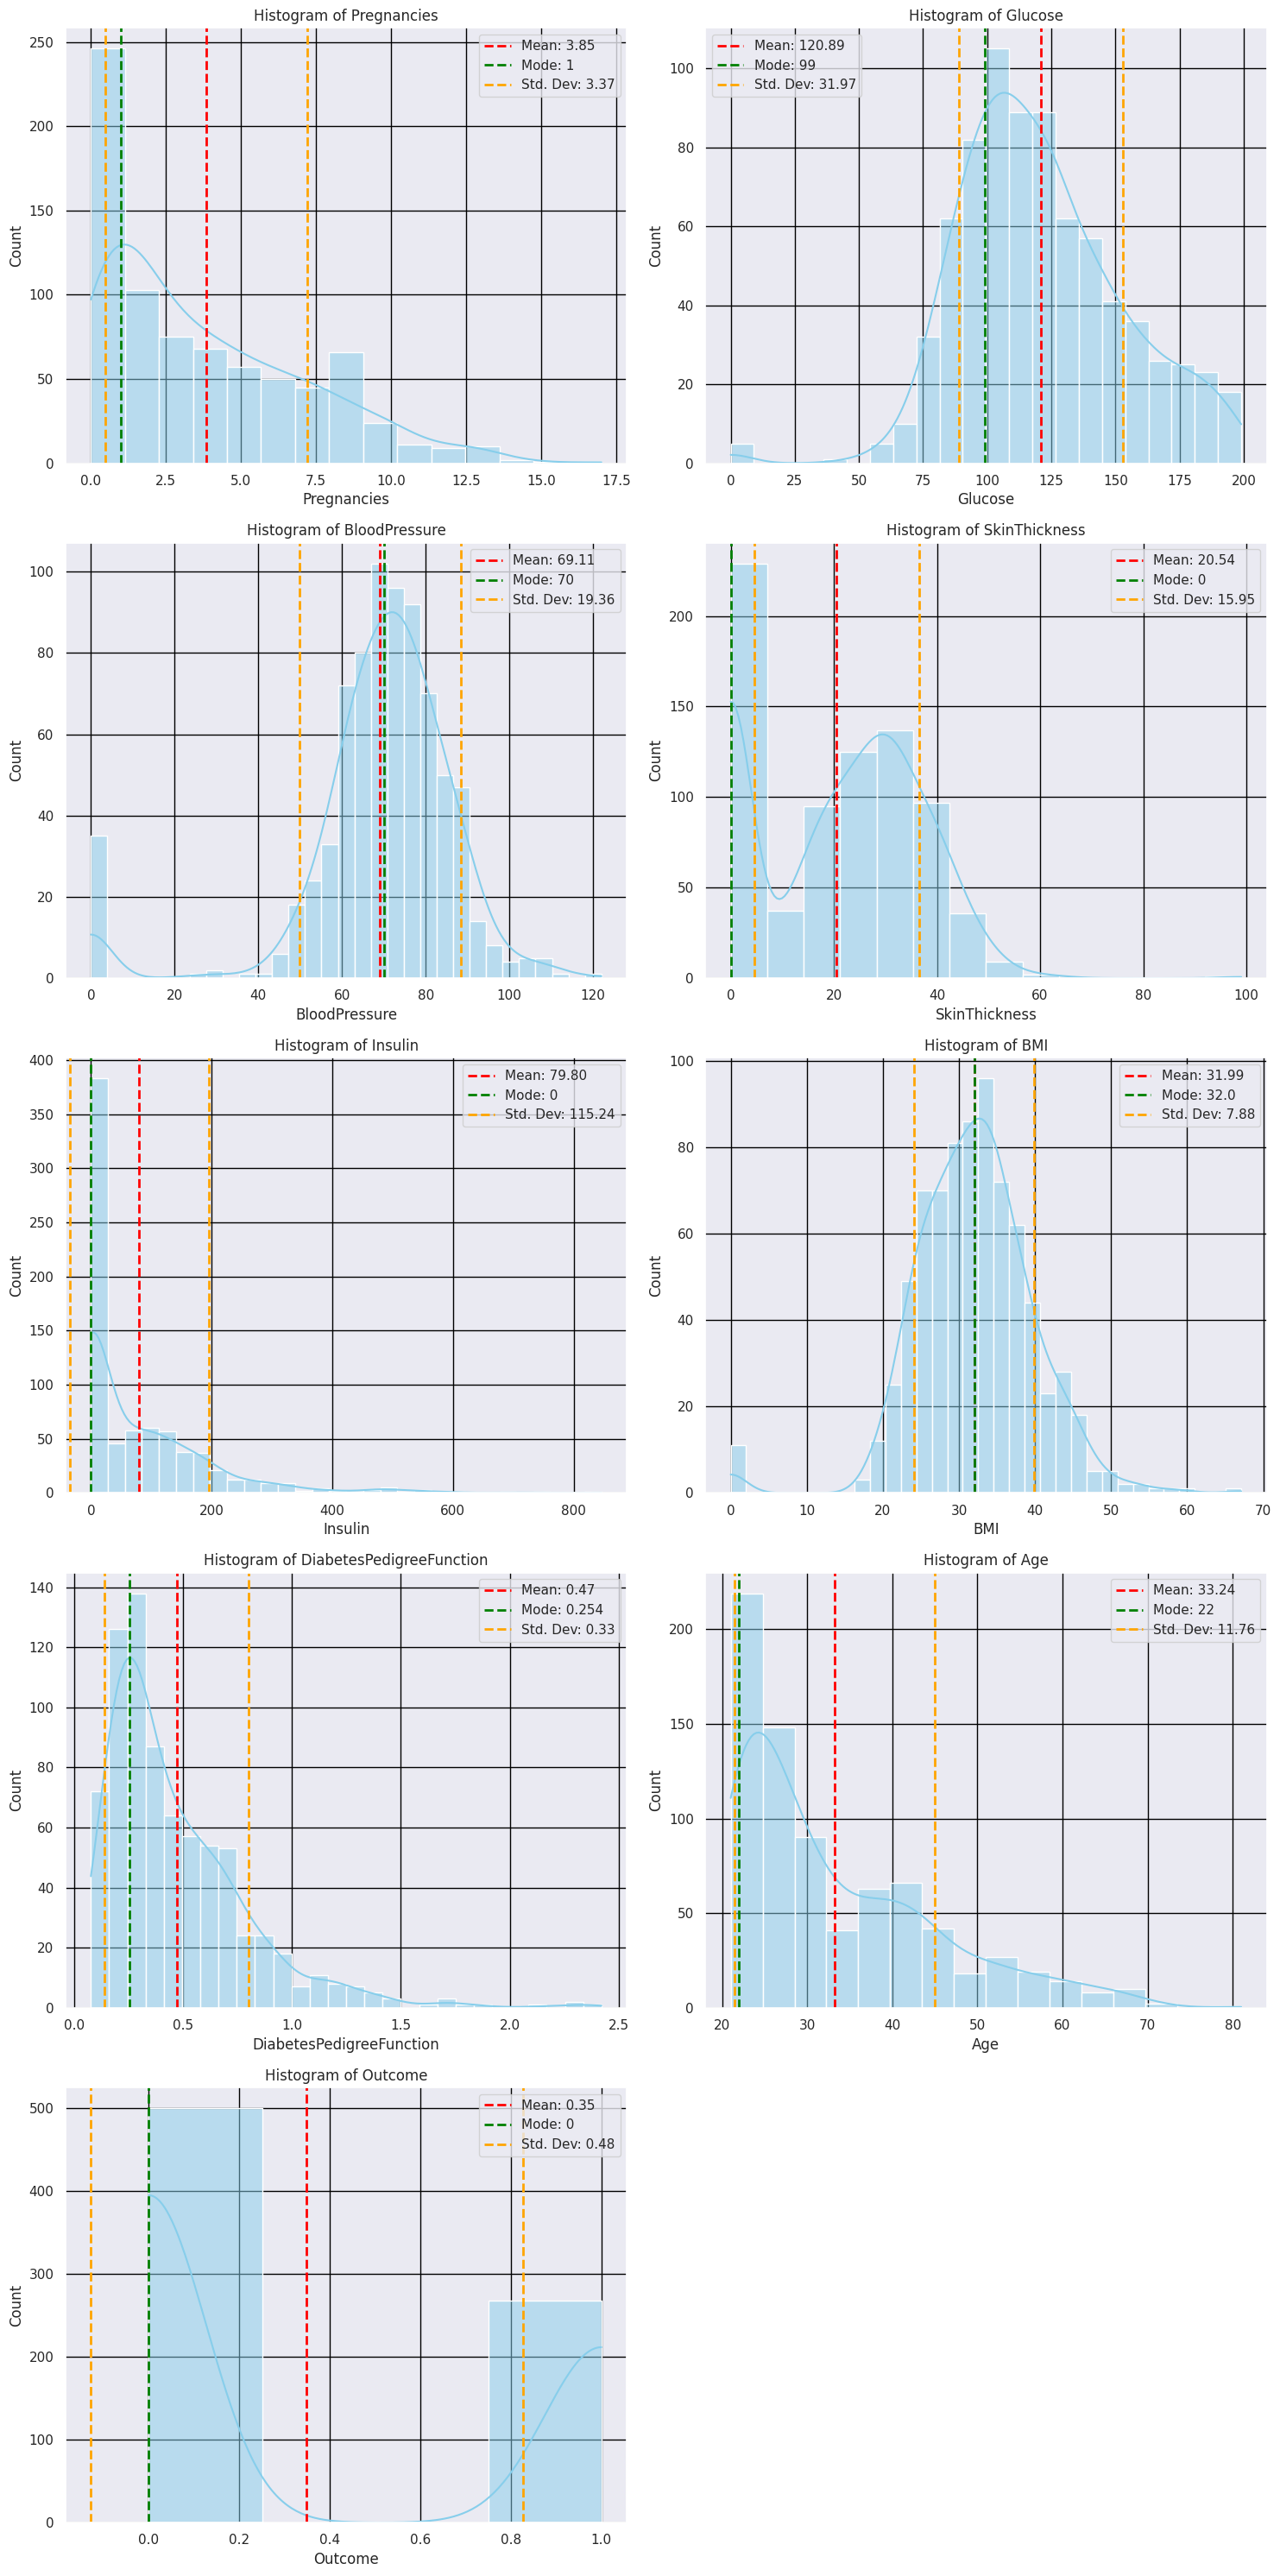

In [3]:
# List of column names
columns = df.columns

# Seaborn style configuration
sns.set(rc={'axes.facecolor': '#eaeaf2', 'grid.color': 'black'})

# Create subplots for each column with two columns
fig, axes = plt.subplots(nrows=len(columns)//2 + len(columns)%2, ncols=2, figsize=(15, 6 * (len(columns)//2 + len(columns)%2)))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Iterate over each column
for i, col in enumerate(columns):
    # Calculate mean, mode, and standard deviation
    mean = df[col].mean()
    mode = df[col].mode()  # There can be multiple modes; we take the first one
    deviation = df[col].std()

    # Use Freedman-Diaconis rule for bin width
    bin_width = 2 * (df[col].quantile(0.75) - df[col].quantile(0.25)) / (len(df[col]) ** (1/3))
    bins = int((max(df[col]) - min(df[col])) / bin_width)

    # Plot the histogram
    sns.histplot(df[col], bins=bins, kde=True, color='skyblue', ax=axes[i])

    # Vertical line for the mean
    axes[i].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

    # Vertical line for the mode
    axes[i].axvline(mode.iloc[0], color='green', linestyle='dashed', linewidth=2, label=f'Mode: {mode.iloc[0]}')

    # Vertical lines for standard deviation
    axes[i].axvline(mean + deviation, color='orange', linestyle='dashed', linewidth=2, label=f'Std. Dev: {deviation:.2f}')
    axes[i].axvline(mean - deviation, color='orange', linestyle='dashed', linewidth=2)

    axes[i].legend()
    axes[i].set_title(f'Histogram of {col}')

# Hide any empty subplots
for j in range(len(columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()